<a href="https://colab.research.google.com/github/prachids-356/Data-science-internship-Prodigy-InfoTech/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

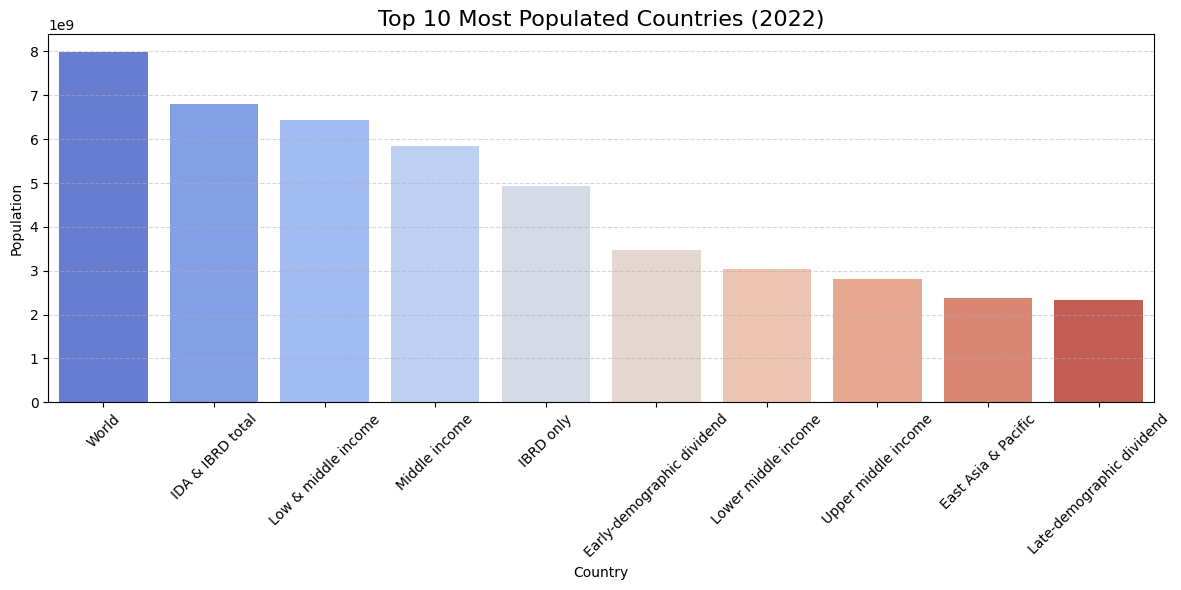

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
import io

# Step 1: Download the dataset ZIP file from the World Bank
url ="https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
response = requests.get(url)

# Step 2: Extract the CSV from the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Find the main data file (it usually starts with 'API_')
    for filename in z.namelist():
        if filename.startswith('API_SP.POP.TOTL_DS2') and filename.endswith('.csv'):
            with z.open(filename) as f:
                df = pd.read_csv(f, skiprows=4)
# Step 3: Select latest available year (example: 2022)

df_latest = df[['Country Name', '2022']].dropna()
df_latest.columns = ['Country', 'Population']




# Step 4: Sort and pick top 10 most populated countries
df_top10 = df_latest.sort_values(by='Population',
ascending=False).head(10)
# Step 5: Plot bar chart

plt.figure(figsize=(12, 6))

# Add hue=Country and legend=False to address FutureWarning

sns.barplot(x='Country', y='Population', data=df_top10,
palette='coolwarm', hue='Country', legend=False)
plt.title('Top 10 Most Populated Countries (2022)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin  

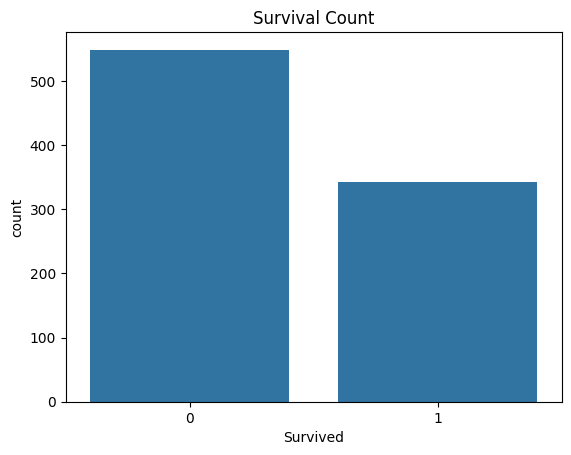

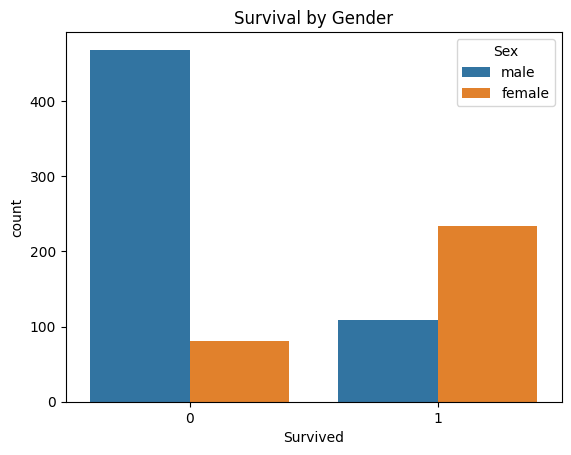

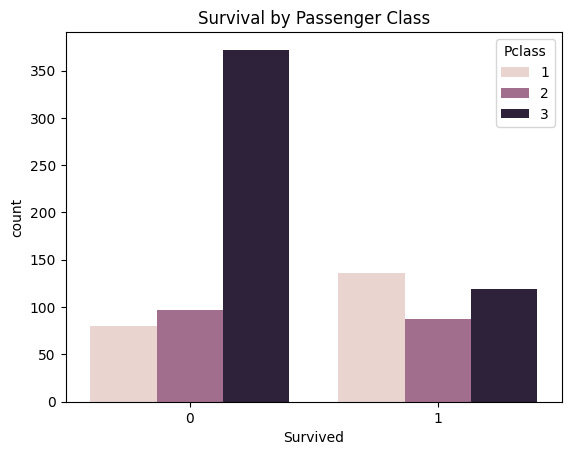

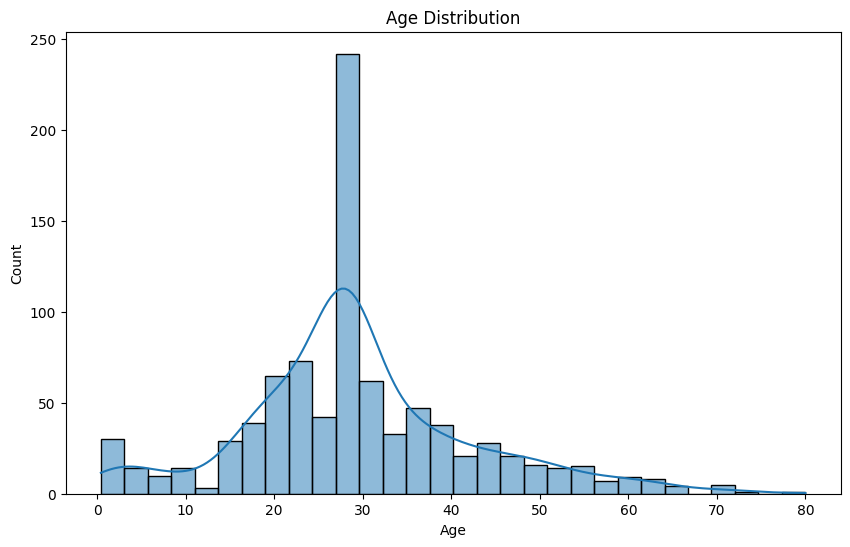

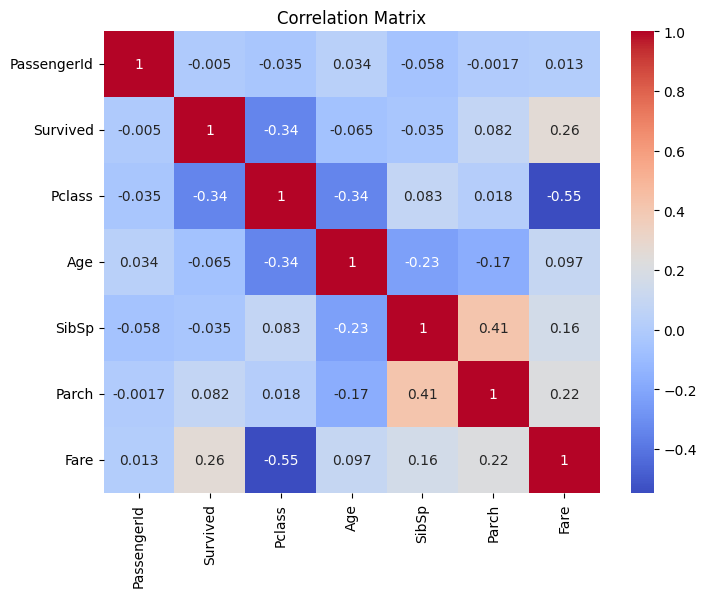

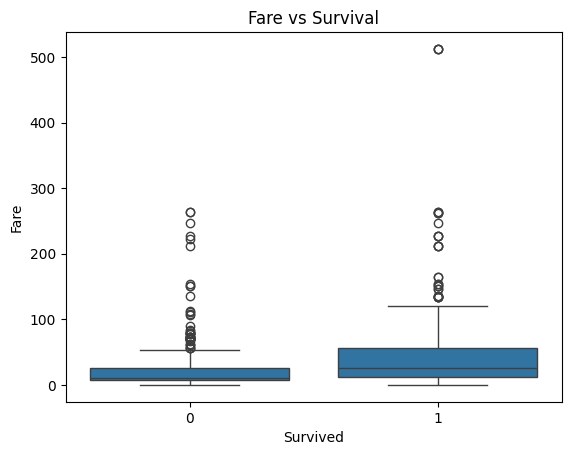


Accuracy: 0.9146637533381888

Confusion Matrix:
 [[7054  249]
 [ 454  481]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.51      0.58       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



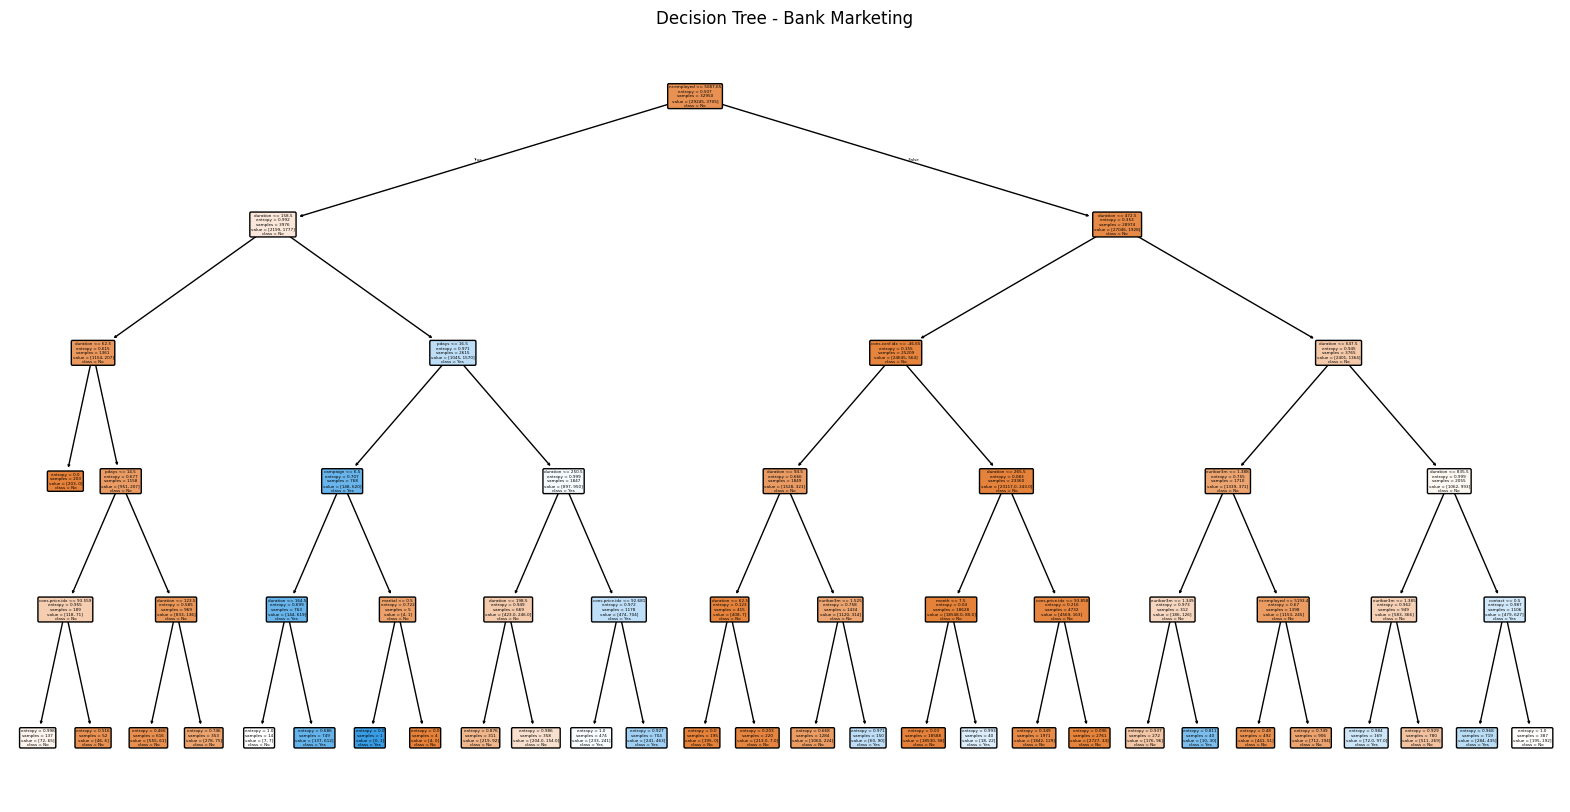

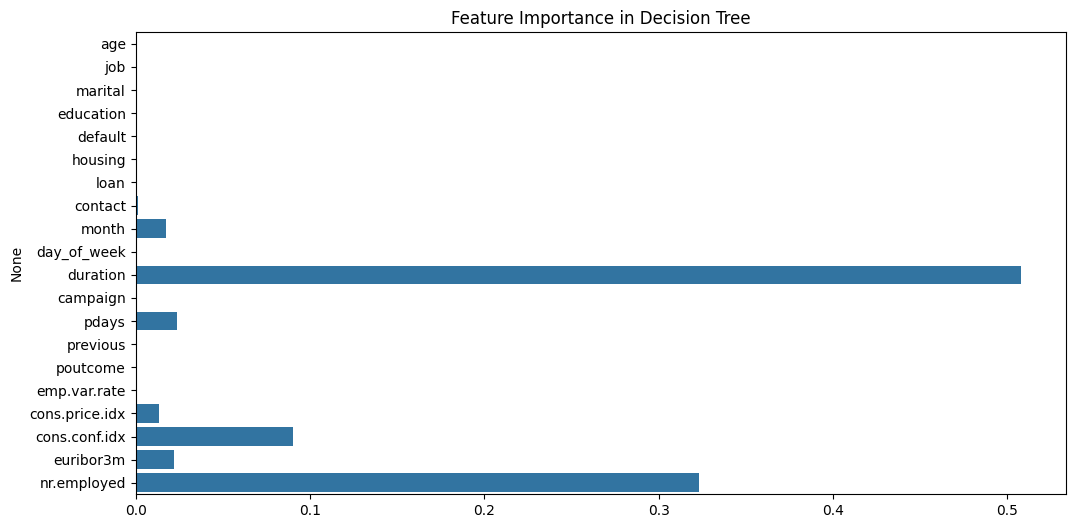

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

# Step 1: Download the dataset ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

# Step 2: Extract the desired CSV from the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Find the main data file (it's 'bank-additional-full.csv' in this zip)
    with z.open('bank-additional/bank-additional-full.csv') as f:
        df = pd.read_csv(f, sep=';')


# Step 3: Encode categorical columns
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Step 4: Split data
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']  # Target variable: y (0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()

# Step 8: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importance in Decision Tree")
plt.show()

Original dataset not found. Creating sample data for demonstration...

Sample data created for demonstration purposes


/tmp/ipython-input-3246820972.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,


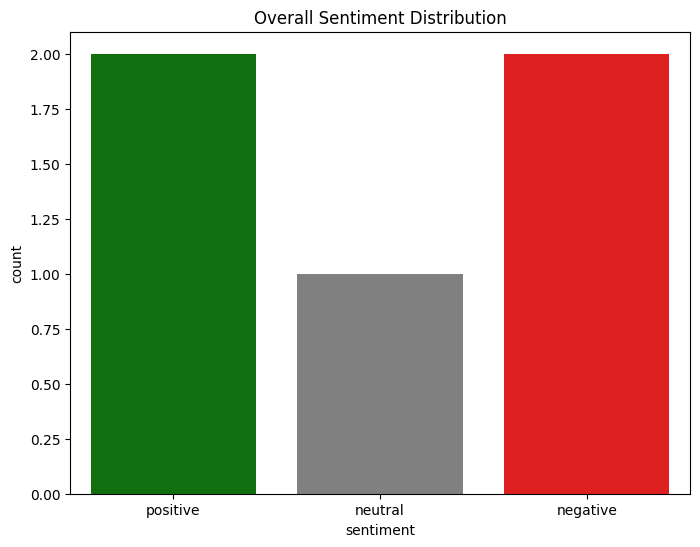

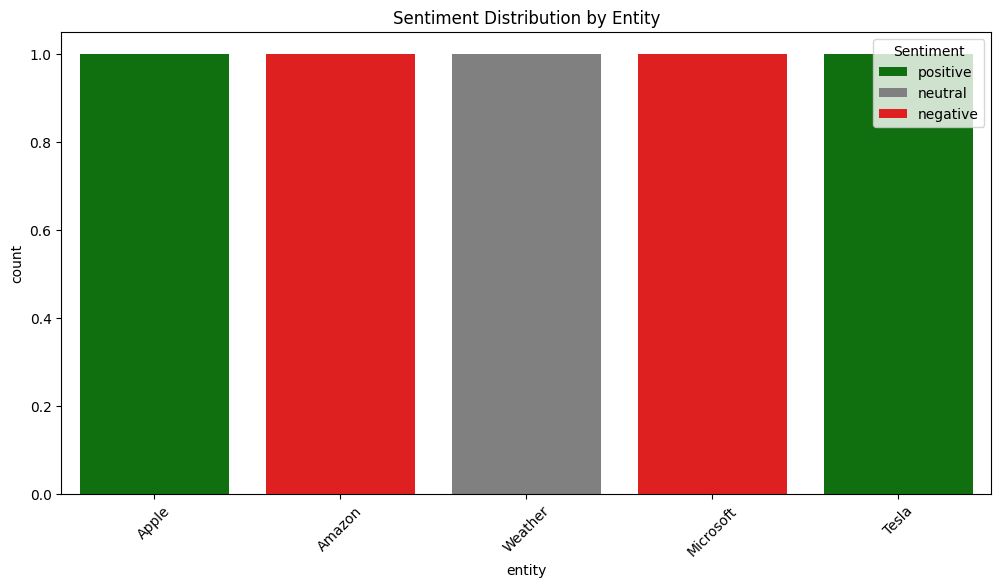

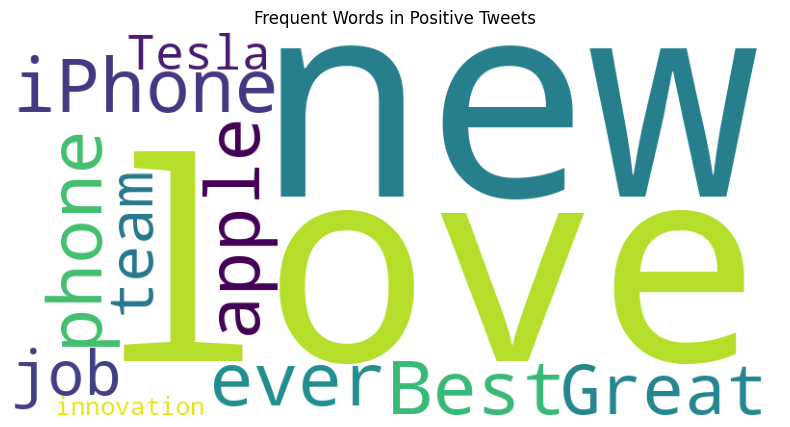

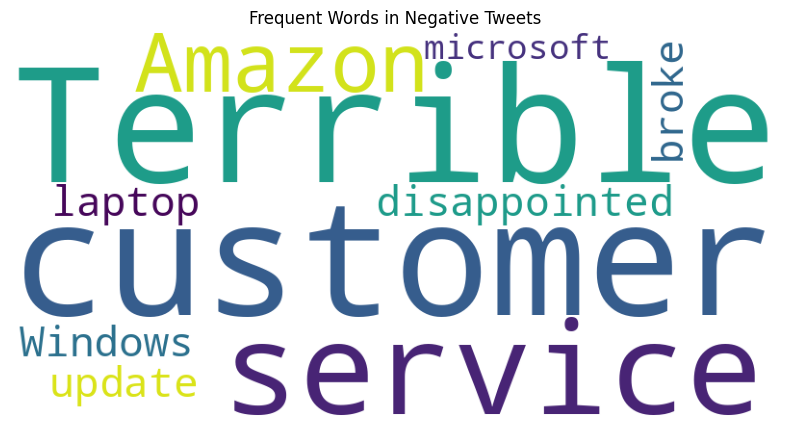

/tmp/ipython-input-3246820972.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')


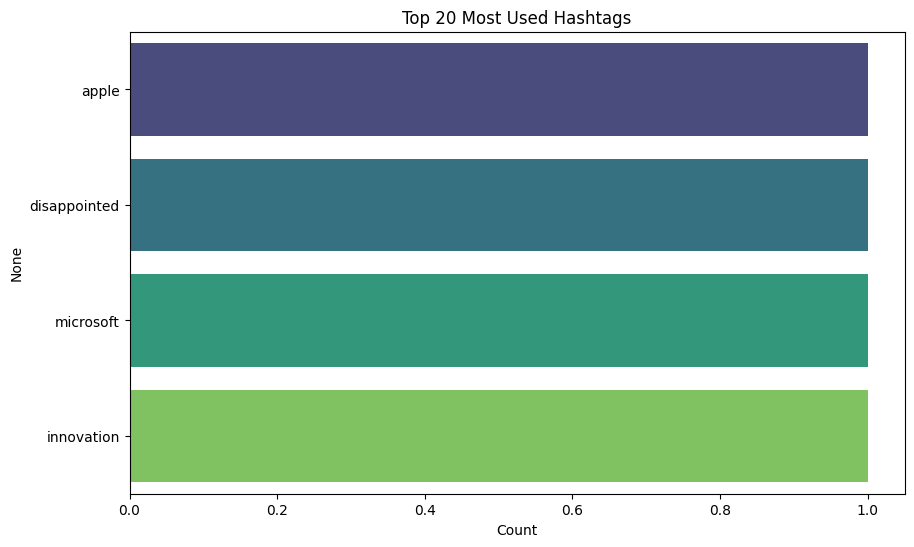


Analysis complete!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords if not already present
nltk.download('stopwords', quiet=True)

# Load data - UPDATE THIS FILENAME TO MATCH YOUR DOWNLOADED FILE
try:
    df = pd.read_csv('twitter_entity_sentiment.csv')  # Common filename for this dataset
    print("Data loaded successfully!")

    # Display basic info
    print("\nData Overview:")
    print(df.head())
    print("\nColumns:", df.columns.tolist())

except FileNotFoundError:
    print("Original dataset not found. Creating sample data for demonstration...")
    # Create sample data if real dataset isn't available
    sample_data = {
        'tweet_text': [
            'I love the new iPhone! Best phone ever #apple',
            'Terrible customer service from @Amazon #disappointed',
            'The weather is nice today',
            'Windows 11 update broke my laptop #microsoft',
            'Great job by the team @Tesla! #innovation'
        ],
        'sentiment': ['positive', 'negative', 'neutral', 'negative', 'positive'],
        'entity': ['Apple', 'Amazon', 'Weather', 'Microsoft', 'Tesla']
    }
    df = pd.DataFrame(sample_data)
    print("\nSample data created for demonstration purposes")

## 1. Basic Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df,
              palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
              order=['positive', 'neutral', 'negative'])
plt.title('Overall Sentiment Distribution')
plt.show()

## 2. Sentiment by Entity
if 'entity' in df.columns:
    plt.figure(figsize=(12, 6))
    entity_order = df['entity'].value_counts().nlargest(10).index if len(df['entity'].unique()) > 10 else df['entity'].value_counts().index
    sns.countplot(x='entity', hue='sentiment', data=df[df['entity'].isin(entity_order)],
                  palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
                  hue_order=['positive', 'neutral', 'negative'])
    plt.title('Sentiment Distribution by Entity')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()

## 3. Word Clouds by Sentiment
def generate_wordcloud(text, title):
    if len(text) > 0:
        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             stopwords=set(stopwords.words('english'))).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No text available for {title}")

# Generate word clouds if tweet text exists
if 'tweet_text' in df.columns:
    # Positive words
    positive_text = ' '.join(df[df['sentiment'] == 'positive']['tweet_text'].astype(str))
    generate_wordcloud(positive_text, 'Frequent Words in Positive Tweets')

    # Negative words
    negative_text = ' '.join(df[df['sentiment'] == 'negative']['tweet_text'].astype(str))
    generate_wordcloud(negative_text, 'Frequent Words in Negative Tweets')

## 4. Hashtag Analysis
if 'tweet_text' in df.columns:
    def extract_hashtags(text):
        return re.findall(r'#(\w+)', str(text).lower())

    df['hashtags'] = df['tweet_text'].apply(extract_hashtags)
    all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]

    if len(all_hashtags) > 0:
        hashtag_counts = pd.Series(all_hashtags).value_counts().nlargest(20)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
        plt.title('Top 20 Most Used Hashtags')
        plt.xlabel('Count')
        plt.show()
    else:
        print("No hashtags found in the data")

print("\nAnalysis complete!")

Original dataset not found. Creating sample data for demonstration...

Sample data created for demonstration purposes


/tmp/ipython-input-3246820972.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,


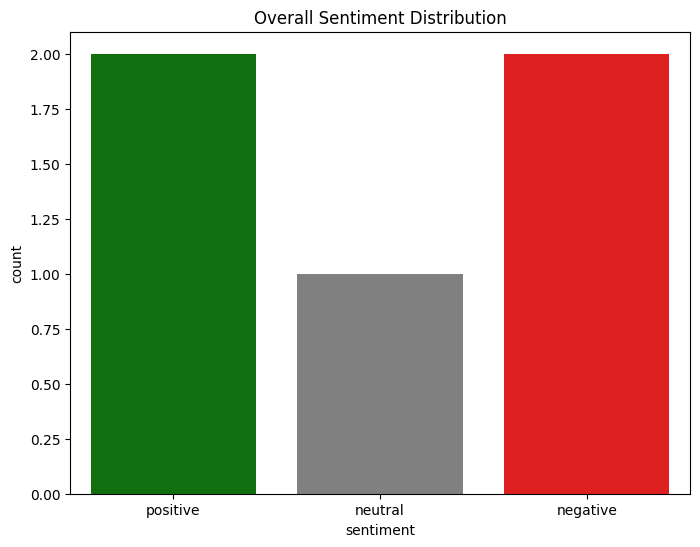

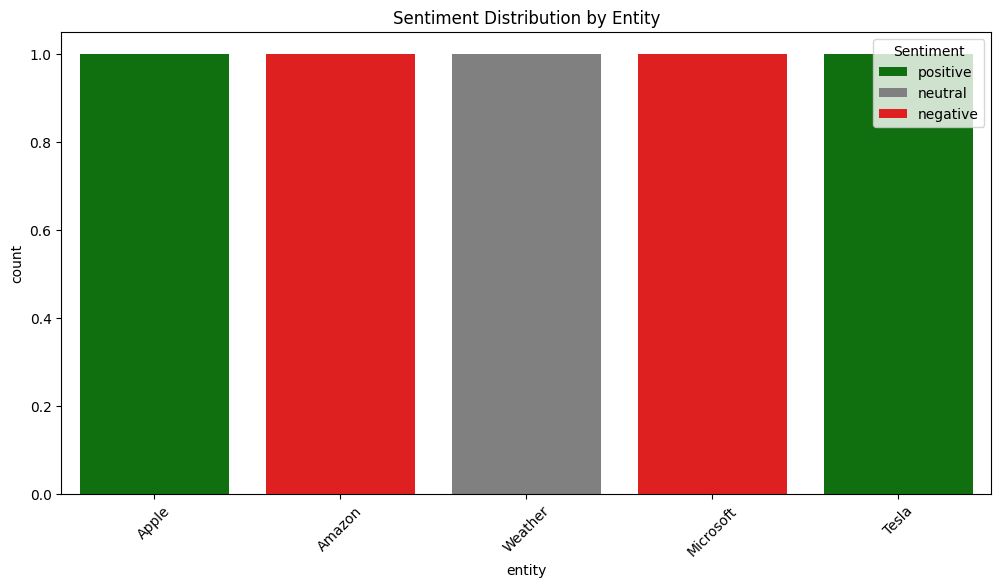

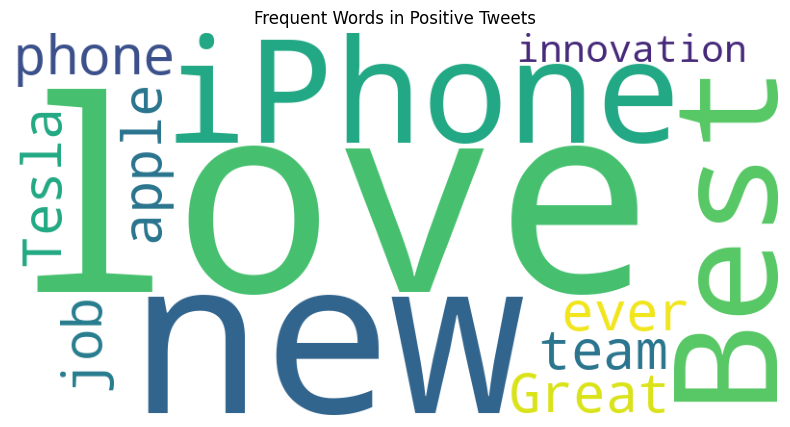

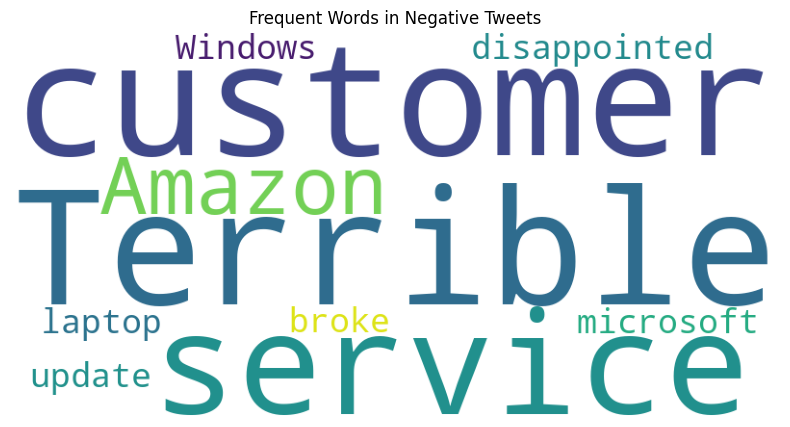

/tmp/ipython-input-3246820972.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')


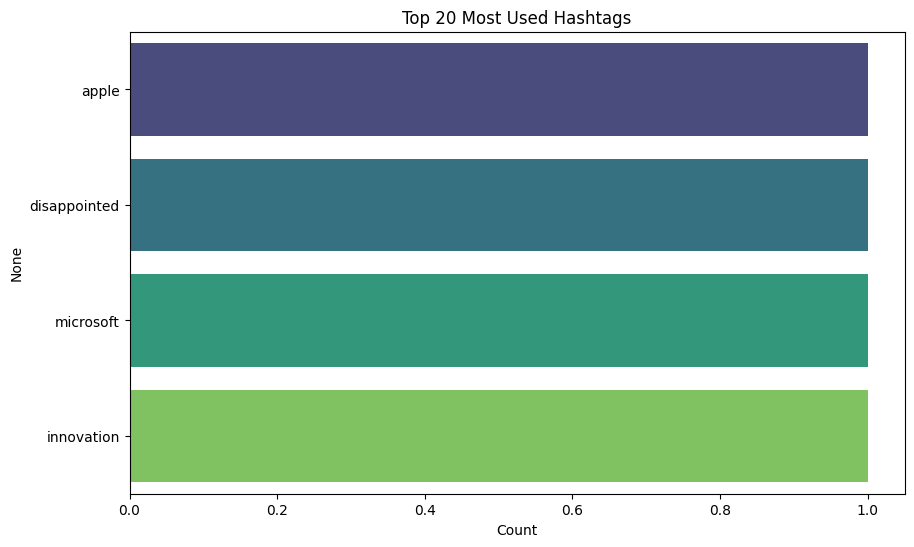


Analysis complete!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords if not already present
nltk.download('stopwords', quiet=True)

# Load data - UPDATE THIS FILENAME TO MATCH YOUR DOWNLOADED FILE
try:
    df = pd.read_csv('twitter_entity_sentiment.csv')  # Common filename for this dataset
    print("Data loaded successfully!")

    # Display basic info
    print("\nData Overview:")
    print(df.head())
    print("\nColumns:", df.columns.tolist())

except FileNotFoundError:
    print("Original dataset not found. Creating sample data for demonstration...")
    # Create sample data if real dataset isn't available
    sample_data = {
        'tweet_text': [
            'I love the new iPhone! Best phone ever #apple',
            'Terrible customer service from @Amazon #disappointed',
            'The weather is nice today',
            'Windows 11 update broke my laptop #microsoft',
            'Great job by the team @Tesla! #innovation'
        ],
        'sentiment': ['positive', 'negative', 'neutral', 'negative', 'positive'],
        'entity': ['Apple', 'Amazon', 'Weather', 'Microsoft', 'Tesla']
    }
    df = pd.DataFrame(sample_data)
    print("\nSample data created for demonstration purposes")

## 1. Basic Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df,
              palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
              order=['positive', 'neutral', 'negative'])
plt.title('Overall Sentiment Distribution')
plt.show()

## 2. Sentiment by Entity
if 'entity' in df.columns:
    plt.figure(figsize=(12, 6))
    entity_order = df['entity'].value_counts().nlargest(10).index if len(df['entity'].unique()) > 10 else df['entity'].value_counts().index
    sns.countplot(x='entity', hue='sentiment', data=df[df['entity'].isin(entity_order)],
                  palette={'positive':'green', 'neutral':'gray', 'negative':'red'},
                  hue_order=['positive', 'neutral', 'negative'])
    plt.title('Sentiment Distribution by Entity')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()

## 3. Word Clouds by Sentiment
def generate_wordcloud(text, title):
    if len(text) > 0:
        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             stopwords=set(stopwords.words('english'))).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No text available for {title}")

# Generate word clouds if tweet text exists
if 'tweet_text' in df.columns:
    # Positive words
    positive_text = ' '.join(df[df['sentiment'] == 'positive']['tweet_text'].astype(str))
    generate_wordcloud(positive_text, 'Frequent Words in Positive Tweets')

    # Negative words
    negative_text = ' '.join(df[df['sentiment'] == 'negative']['tweet_text'].astype(str))
    generate_wordcloud(negative_text, 'Frequent Words in Negative Tweets')

## 4. Hashtag Analysis
if 'tweet_text' in df.columns:
    def extract_hashtags(text):
        return re.findall(r'#(\w+)', str(text).lower())

    df['hashtags'] = df['tweet_text'].apply(extract_hashtags)
    all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]

    if len(all_hashtags) > 0:
        hashtag_counts = pd.Series(all_hashtags).value_counts().nlargest(20)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, palette='viridis')
        plt.title('Top 20 Most Used Hashtags')
        plt.xlabel('Count')
        plt.show()
    else:
        print("No hashtags found in the data")

print("\nAnalysis complete!")

Dataset not found. Creating sample data for demonstration...
Sample data created with realistic distributions


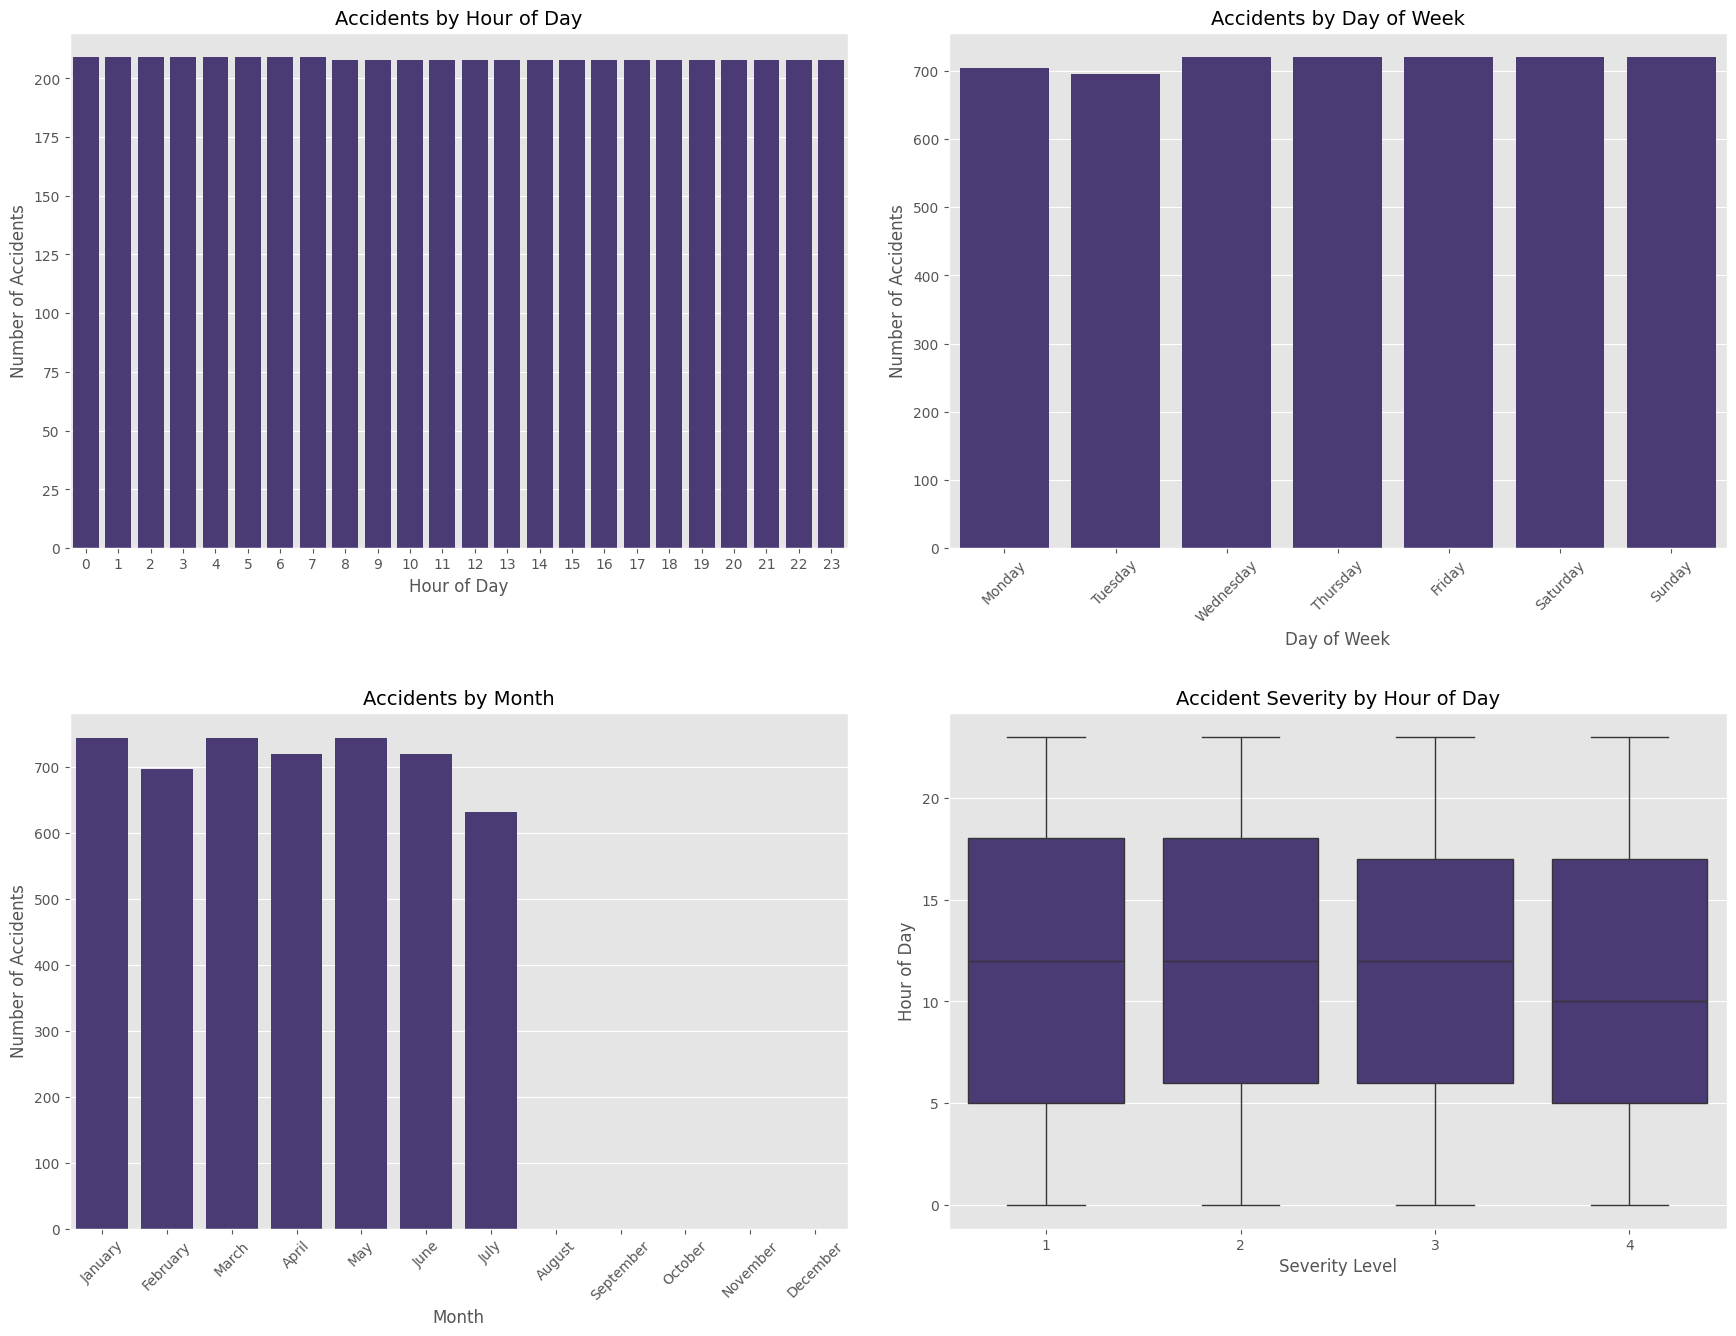

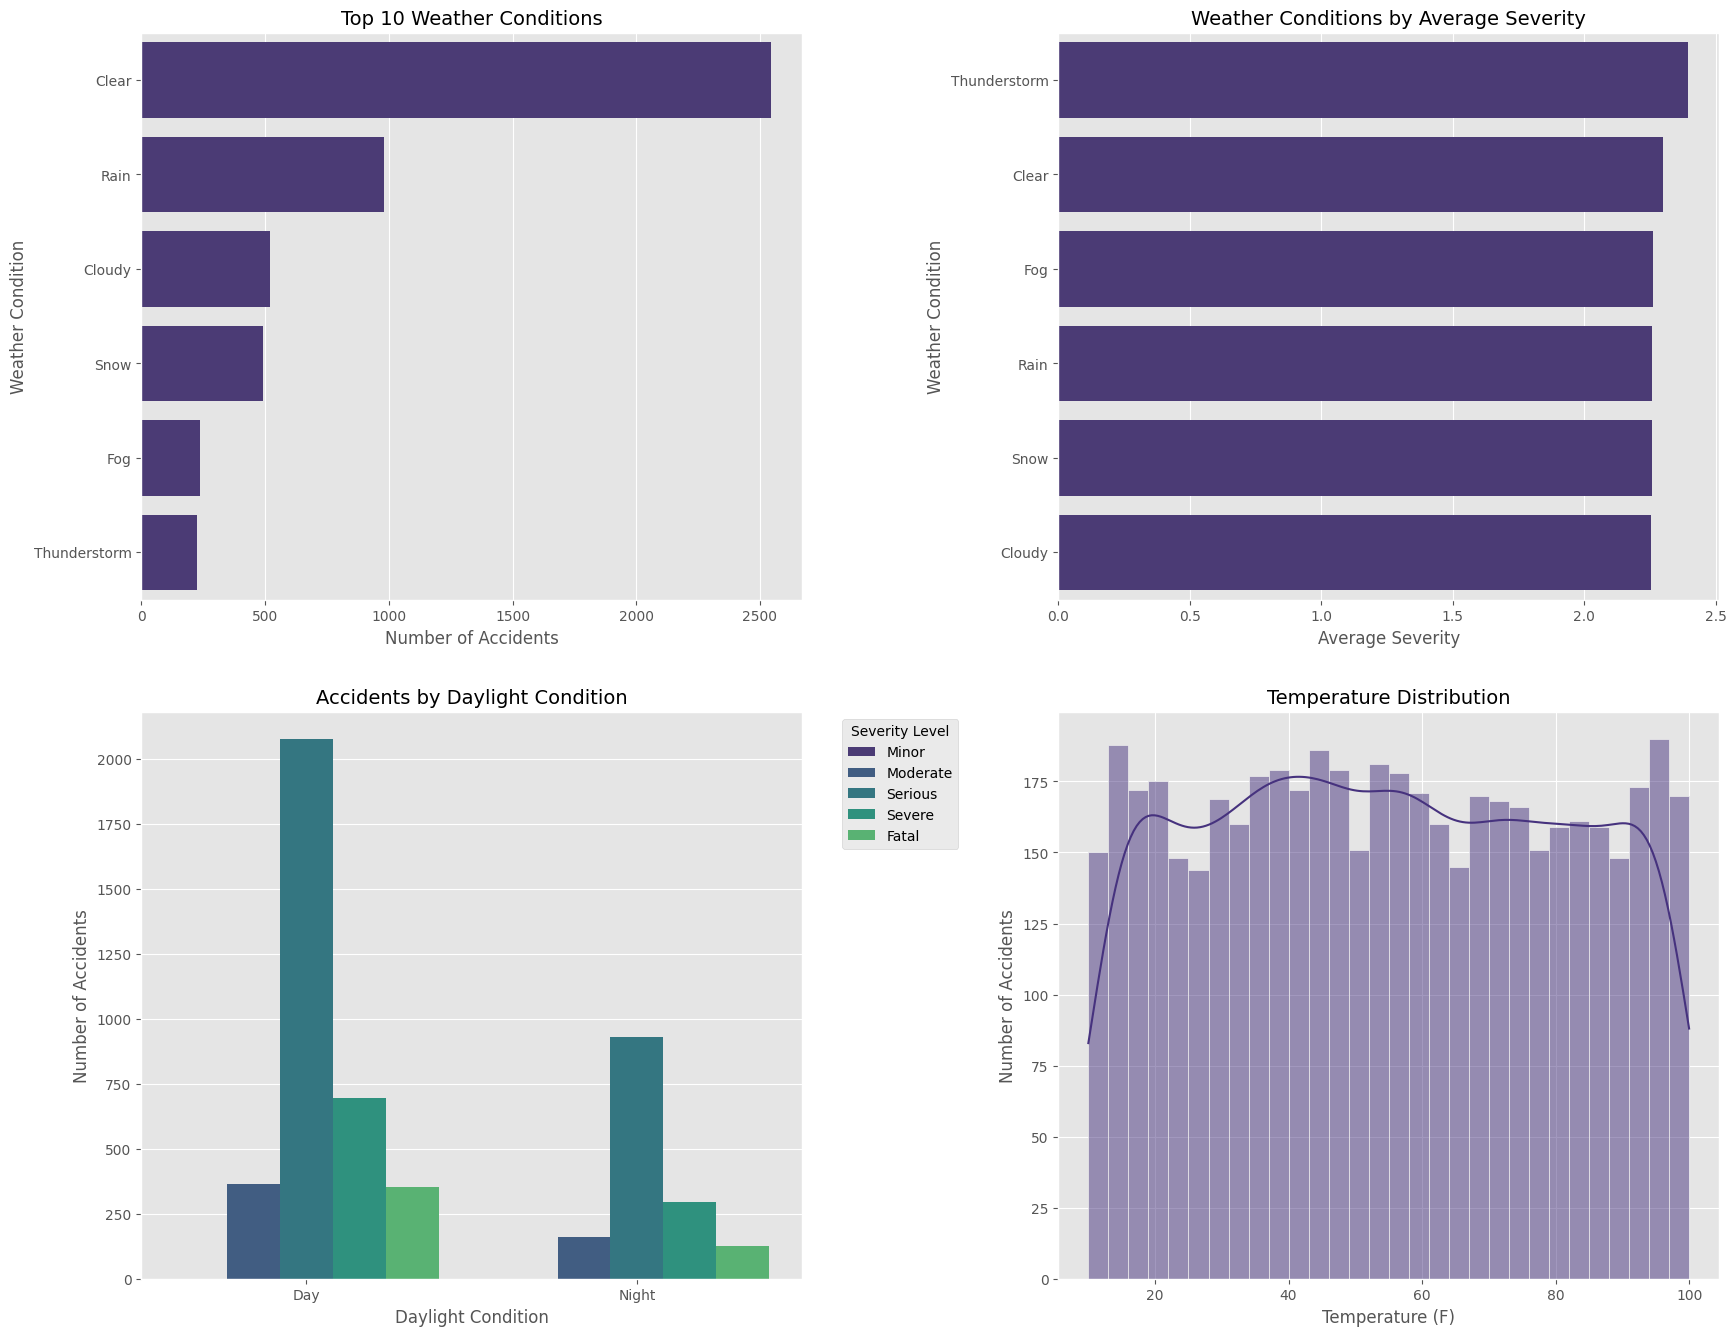


 Creating accident hotspot map...
Hotspot map saved as 'accident_hotspots.html'


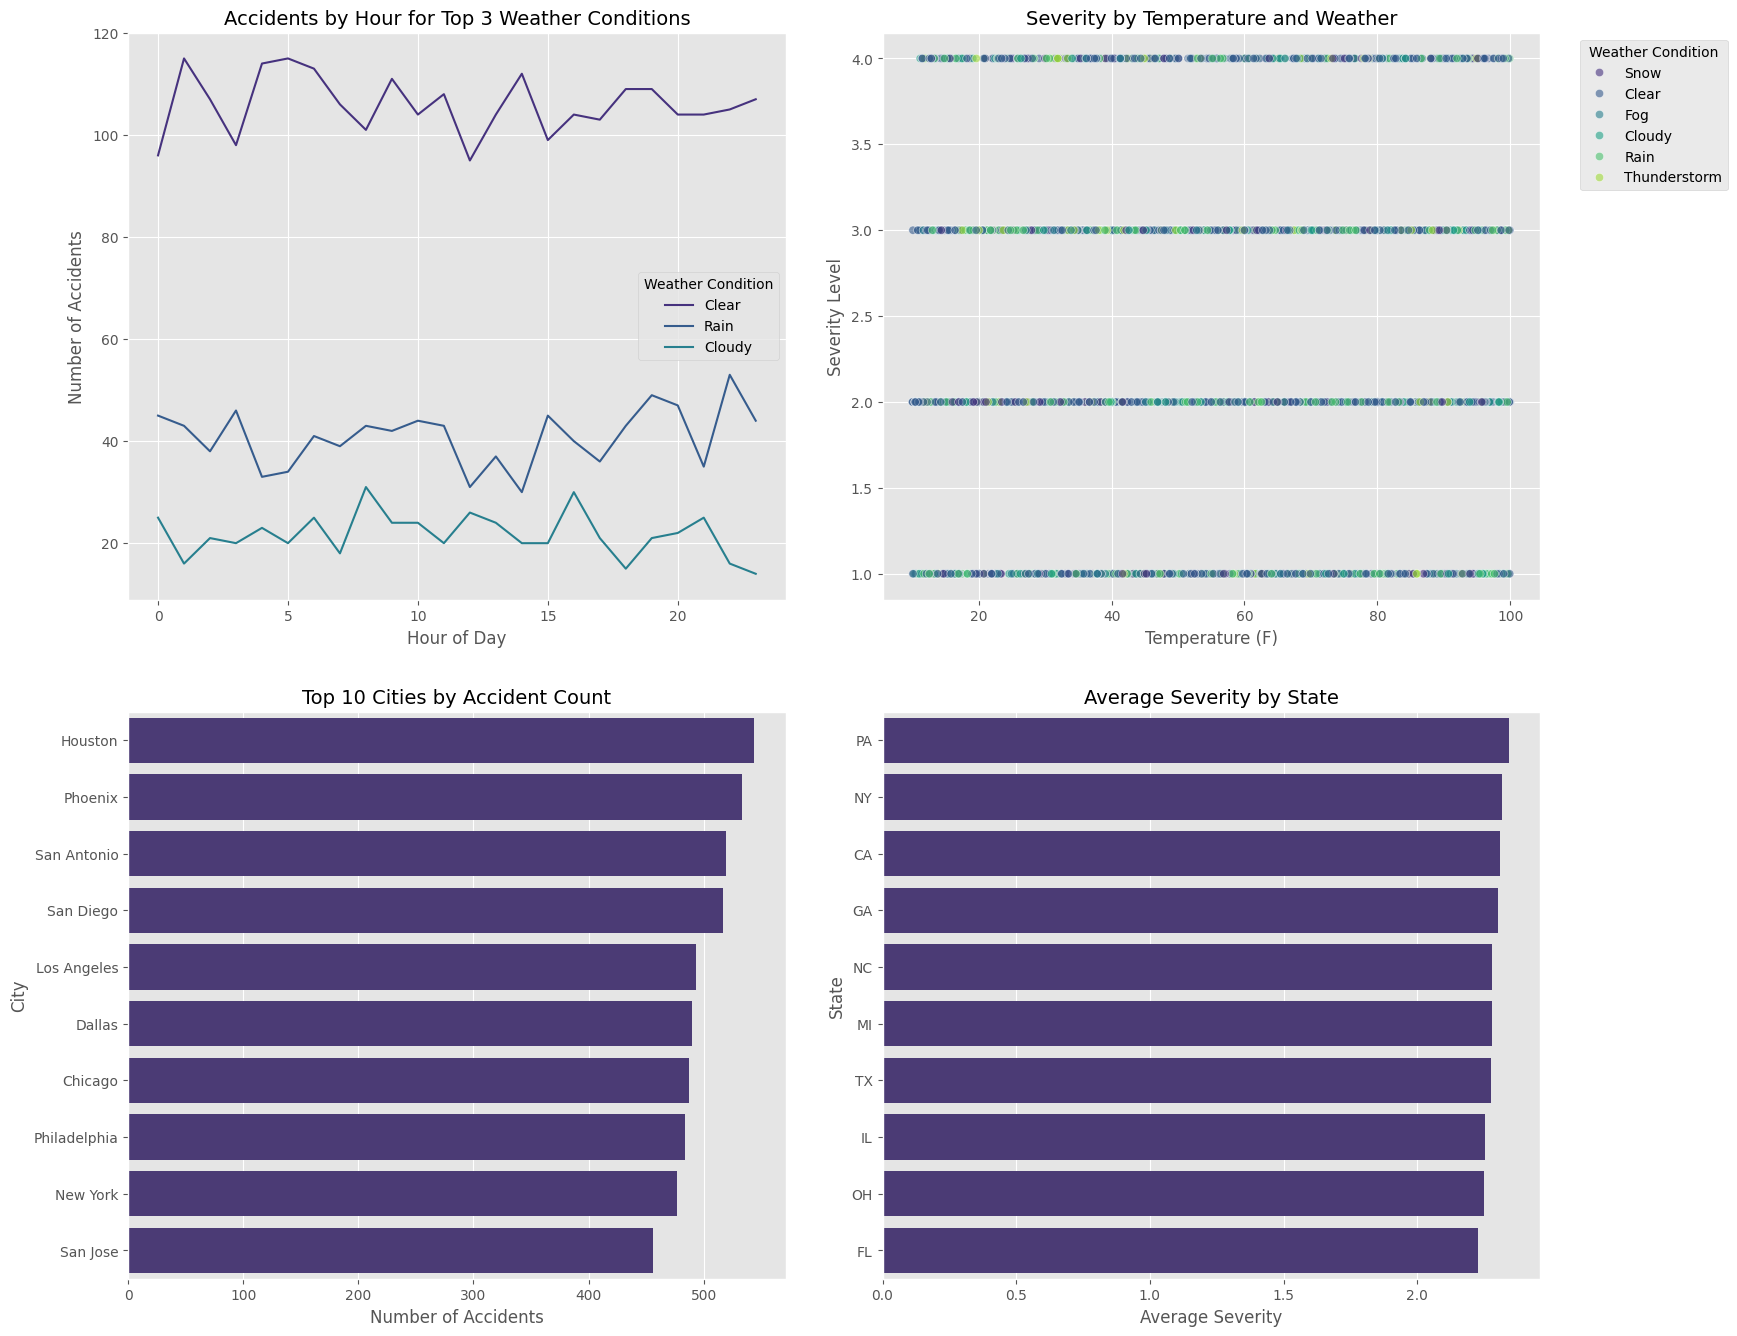


 SUMMARY STATISTICS

 TEMPORAL DISTRIBUTION
------------------------------
Most common hour: 0:00
Most common weekday: Friday
Most common month: January

 WEATHER CONDITIONS
------------------------------
Most common weather: Clear
Weather with highest severity: Thunderstorm

 LOCATION ANALYSIS
------------------------------
City with most accidents: Houston
State with most accidents: PA
State with highest severity: PA

 SEVERITY ANALYSIS
------------------------------
Average severity: 2.28
Severity distribution:
Severity_Level
Serious     60.1
Severe      19.8
Moderate    10.5
Fatal        9.6
Minor        0.0
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style and figure parameters to prevent overlap
plt.style.use('ggplot')
sns.set_palette('viridis')
plt.rcParams['figure.autolayout'] = True  # Automatically adjust subplots
plt.rcParams['figure.constrained_layout.use'] = True  # Use constrained layout

## 1. Data Loading and Preparation
def load_data():
    """Load the dataset or create sample data if not available"""
    try:
        df = pd.read_csv('US_Accidents_Dataset.csv')
        print("Real dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Date range: {df['Start_Time'].min()} to {df['Start_Time'].max()}")
        return df
    except FileNotFoundError:
        print("Dataset not found. Creating sample data for demonstration...")
        np.random.seed(42)
        dates = pd.date_range('2020-01-01', periods=5000, freq='H')
        cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
                 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
        states = ['CA', 'TX', 'NY', 'FL', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']

        sample_data = {
            'ID': range(5000),
            'Severity': np.random.choice([1, 2, 3, 4], size=5000, p=[0.1, 0.6, 0.2, 0.1]),
            'Start_Time': dates,
            'End_Time': dates + pd.to_timedelta(np.random.randint(1, 120, size=5000), unit='m'),
            'Weather_Condition': np.random.choice(['Clear', 'Rain', 'Snow', 'Fog', 'Cloudy', 'Thunderstorm'],
                                               size=5000, p=[0.5, 0.2, 0.1, 0.05, 0.1, 0.05]),
            'Sunrise_Sunset': np.random.choice(['Day', 'Night'], size=5000, p=[0.7, 0.3]),
            'City': np.random.choice(cities, size=5000),
            'State': np.random.choice(states, size=5000),
            'Start_Lat': np.random.uniform(25, 49, size=5000),
            'Start_Lng': np.random.uniform(-125, -67, size=5000),
            'Temperature(F)': np.random.uniform(10, 100, size=5000),
            'Visibility(mi)': np.random.uniform(0.1, 10, size=5000),
            'Wind_Speed(mph)': np.random.uniform(0, 30, size=5000),
            'Precipitation(in)': np.random.exponential(0.1, size=5000)
        }
        df = pd.DataFrame(sample_data)
        print("Sample data created with realistic distributions")
        return df

df = load_data()

# Data cleaning and feature engineering
def prepare_data(df):
    """Prepare the data for analysis"""
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    df['Hour'] = df['Start_Time'].dt.hour
    df['Weekday'] = df['Start_Time'].dt.day_name()
    df['Month'] = df['Start_Time'].dt.month_name()
    df['Year'] = df['Start_Time'].dt.year
    df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')
    df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna('Unknown')
    df['Severity_Level'] = pd.cut(df['Severity'], bins=[0, 1, 2, 3, 4, 5],
                                labels=['Minor', 'Moderate', 'Serious', 'Severe', 'Fatal'],
                                right=False)
    return df

df = prepare_data(df)

## 2. Temporal Analysis with Proper Spacing
def plot_temporal_analysis(df):
    """Visualize temporal patterns with proper spacing"""
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    # Hourly distribution
    sns.countplot(ax=axes[0, 0], x='Hour', data=df)
    axes[0, 0].set_title('Accidents by Hour of Day', fontsize=14)
    axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
    axes[0, 0].set_ylabel('Number of Accidents', fontsize=12)

    # Weekly distribution
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.countplot(ax=axes[0, 1], x='Weekday', data=df, order=weekday_order)
    axes[0, 1].set_title('Accidents by Day of Week', fontsize=14)
    axes[0, 1].set_xlabel('Day of Week', fontsize=12)
    axes[0, 1].set_ylabel('Number of Accidents', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Monthly distribution
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']
    sns.countplot(ax=axes[1, 0], x='Month', data=df, order=month_order)
    axes[1, 0].set_title('Accidents by Month', fontsize=14)
    axes[1, 0].set_xlabel('Month', fontsize=12)
    axes[1, 0].set_ylabel('Number of Accidents', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Severity by hour
    sns.boxplot(ax=axes[1, 1], x='Severity', y='Hour', data=df)
    axes[1, 1].set_title('Accident Severity by Hour of Day', fontsize=14)
    axes[1, 1].set_xlabel('Severity Level', fontsize=12)
    axes[1, 1].set_ylabel('Hour of Day', fontsize=12)

    plt.tight_layout(pad=3.0)  # Add extra padding between subplots
    plt.show()

plot_temporal_analysis(df)

## 3. Weather Analysis with Proper Spacing
def plot_weather_analysis(df):
    """Analyze weather factors with proper spacing"""
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    # Weather conditions
    weather_counts = df['Weather_Condition'].value_counts().nlargest(10)
    sns.barplot(ax=axes[0, 0], x=weather_counts.values, y=weather_counts.index)
    axes[0, 0].set_title('Top 10 Weather Conditions', fontsize=14)
    axes[0, 0].set_xlabel('Number of Accidents', fontsize=12)
    axes[0, 0].set_ylabel('Weather Condition', fontsize=12)

    # Severity by weather
    weather_severity = df.groupby('Weather_Condition')['Severity'].mean().nlargest(10)
    sns.barplot(ax=axes[0, 1], x=weather_severity.values, y=weather_severity.index)
    axes[0, 1].set_title('Weather Conditions by Average Severity', fontsize=14)
    axes[0, 1].set_xlabel('Average Severity', fontsize=12)
    axes[0, 1].set_ylabel('Weather Condition', fontsize=12)

    # Daylight conditions
    sns.countplot(ax=axes[1, 0], x='Sunrise_Sunset', hue='Severity_Level', data=df)
    axes[1, 0].set_title('Accidents by Daylight Condition', fontsize=14)
    axes[1, 0].set_xlabel('Daylight Condition', fontsize=12)
    axes[1, 0].set_ylabel('Number of Accidents', fontsize=12)
    axes[1, 0].legend(title='Severity Level', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Temperature distribution
    if 'Temperature(F)' in df.columns:
        sns.histplot(ax=axes[1, 1], x=df['Temperature(F)'], bins=30, kde=True)
        axes[1, 1].set_title('Temperature Distribution', fontsize=14)
        axes[1, 1].set_xlabel('Temperature (F)', fontsize=12)
        axes[1, 1].set_ylabel('Number of Accidents', fontsize=12)

    plt.tight_layout(pad=3.0)  # Add extra padding
    plt.show()

plot_weather_analysis(df)

## 4. Geospatial Analysis (unchanged)
def create_accident_map(df):
    """Create interactive map of accident hotspots"""
    print("\n Creating accident hotspot map...")
    sample_df = df.sample(n=2000, random_state=42) if len(df) > 2000 else df
    avg_lat = sample_df['Start_Lat'].mean()
    avg_lng = sample_df['Start_Lng'].mean()
    m = folium.Map(location=[avg_lat, avg_lng], zoom_start=5, tiles='CartoDB dark_matter')
    heat_data = [[row['Start_Lat'], row['Start_Lng']] for _, row in sample_df.iterrows()]
    HeatMap(heat_data, radius=12, blur=15, max_zoom=13).add_to(m)

    top_cities = df['City'].value_counts().nlargest(5).index
    for city in top_cities:
        city_df = df[df['City'] == city].sample(min(50, len(df[df['City'] == city])))
        for _, row in city_df.iterrows():
            popup_text = f"""
            City: {row['City']}, {row['State']}
            Severity: {row['Severity']}
            Weather: {row['Weather_Condition']}
            Time: {row['Start_Time']}
            """
            folium.CircleMarker(
                location=[row['Start_Lat'], row['Start_Lng']],
                radius=row['Severity'],
                color='red' if row['Severity'] > 3 else 'orange',
                fill=True,
                fill_opacity=0.7,
                popup=folium.Popup(popup_text, max_width=250)
            ).add_to(m)

    m.save('accident_hotspots.html')

    print("Hotspot map saved as 'accident_hotspots.html'")

create_accident_map(df)

## 5. Cross-Factor Analysis with Proper Spacing
def plot_cross_factor_analysis(df):
    """Analyze relationships between factors with proper spacing"""
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))

    # Weather vs time of day
    weather_hour = df.groupby(['Hour', 'Weather_Condition']).size().unstack().fillna(0)
    top_weather = df['Weather_Condition'].value_counts().nlargest(3).index
    weather_hour[top_weather].plot(ax=axes[0, 0])
    axes[0, 0].set_title('Accidents by Hour for Top 3 Weather Conditions', fontsize=14)
    axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
    axes[0, 0].set_ylabel('Number of Accidents', fontsize=12)
    axes[0, 0].legend(title='Weather Condition')

    # Severity by weather and temperature
    if 'Temperature(F)' in df.columns:
        sns.scatterplot(ax=axes[0, 1], x='Temperature(F)', y='Severity',
                       hue='Weather_Condition', data=df, alpha=0.6)
        axes[0, 1].set_title('Severity by Temperature and Weather', fontsize=14)
        axes[0, 1].set_xlabel('Temperature (F)', fontsize=12)
        axes[0, 1].set_ylabel('Severity Level', fontsize=12)
        axes[0, 1].legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

    # City analysis
    if 'City' in df.columns:
        city_counts = df['City'].value_counts().nlargest(10)
        sns.barplot(ax=axes[1, 0], x=city_counts.values, y=city_counts.index)
        axes[1, 0].set_title('Top 10 Cities by Accident Count', fontsize=14)
        axes[1, 0].set_xlabel('Number of Accidents', fontsize=12)
        axes[1, 0].set_ylabel('City', fontsize=12)

    # State analysis
    if 'State' in df.columns:
        state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False)
        sns.barplot(ax=axes[1, 1], x=state_severity.values, y=state_severity.index)
        axes[1, 1].set_title('Average Severity by State', fontsize=14)
        axes[1, 1].set_xlabel('Average Severity', fontsize=12)
        axes[1, 1].set_ylabel('State', fontsize=12)

    plt.tight_layout(pad=3.0)  # Add extra padding
    plt.show()

plot_cross_factor_analysis(df)

## 6. Summary Statistics (unchanged)
def show_summary_stats(df):
    print("\n SUMMARY STATISTICS")
    print("="*40)
    print("\n TEMPORAL DISTRIBUTION")
    print("-"*30)
    print(f"Most common hour: {df['Hour'].mode()[0]}:00")
    print(f"Most common weekday: {df['Weekday'].mode()[0]}")
    print(f"Most common month: {df['Month'].mode()[0]}")

    print("\n WEATHER CONDITIONS")
    print("-"*30)
    print(f"Most common weather: {df['Weather_Condition'].mode()[0]}")
    print(f"Weather with highest severity: {df.groupby('Weather_Condition')['Severity'].mean().idxmax()}")

    if 'City' in df.columns:
        print("\n LOCATION ANALYSIS")
        print("-"*30)
        print(f"City with most accidents: {df['City'].value_counts().idxmax()}")
        print(f"State with most accidents: {df['State'].value_counts().idxmax()}")
        print(f"State with highest severity: {df.groupby('State')['Severity'].mean().idxmax()}")

    print("\n SEVERITY ANALYSIS")
    print("-"*30)
    print(f"Average severity: {df['Severity'].mean():.2f}")
    print(f"Severity distribution:\n{df['Severity_Level'].value_counts(normalize=True).mul(100).round(1)}")

show_summary_stats(df)